# <span style = "color:coral"> Stroke Prediction</span>

***

### Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

Find the dataset <a href = "https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset">here</a>

***

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'healthcare-dataset-stroke-data.csv'

In [19]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Check info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Check basic statistical information about the dataset

In [22]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check for null values

In [23]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Remove any rows that contain any null values

In [24]:
df.dropna(inplace =True)

### Check for duplicates

In [25]:
df.duplicated().sum()

0

### Drop id column

In [26]:
df.drop(columns = ['id'], inplace = True)

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Convert all categorical data into numerical with One Hot Encoding

In [28]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


### Plot Countplot of Stroke column

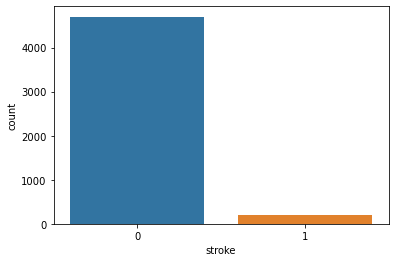

In [31]:
sns.countplot(x = df['stroke'])
plt.show()

### Plot countplot of Heart Disease

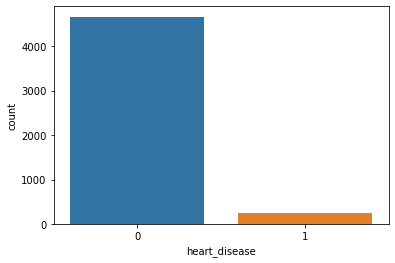

In [32]:
sns.countplot(x = df['heart_disease'])
plt.show()

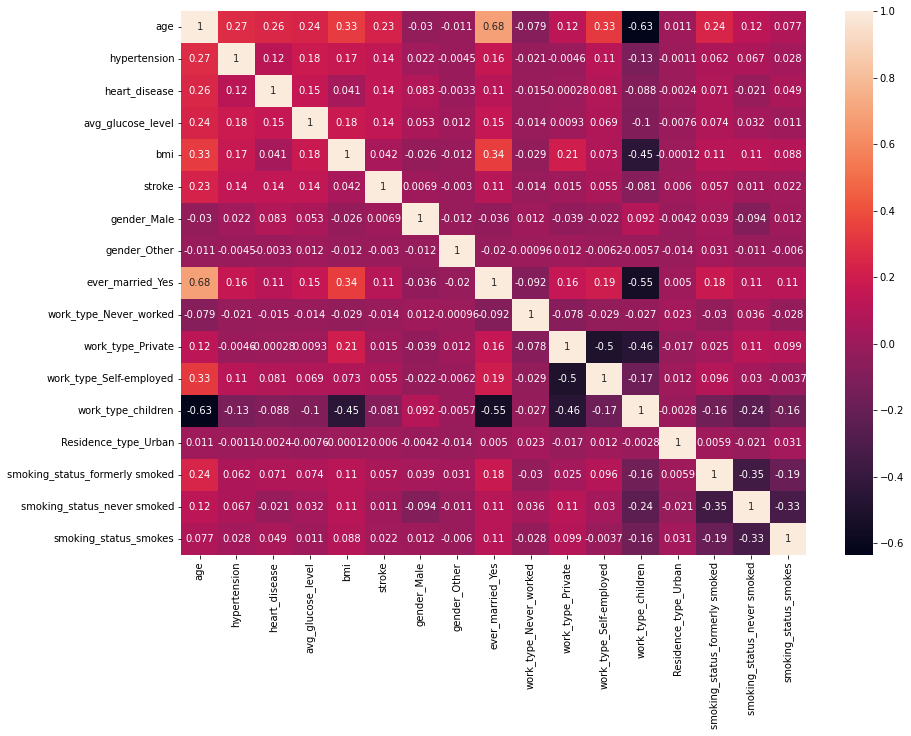

In [38]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot =True)
plt.show()

### Split the dataset into input & Target Variables

In [39]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

### Standardize the data with Standard Scaler

In [40]:
scaler = StandardScaler()

In [43]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [44]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.070138,-0.318067,4.381968,2.777698,0.981345,1.200447,-0.014274,0.729484,-0.067095,0.863918,-0.432978,-0.397906,0.985640,2.205673,-0.778346,-0.420302
1,1.646563,-0.318067,4.381968,0.013842,0.459269,1.200447,-0.014274,0.729484,-0.067095,0.863918,-0.432978,-0.397906,-1.014569,-0.453376,1.284775,-0.420302
2,0.272012,-0.318067,-0.228208,1.484132,0.701207,-0.833023,-0.014274,0.729484,-0.067095,0.863918,-0.432978,-0.397906,0.985640,-0.453376,-0.778346,2.379241
3,1.602222,3.143994,-0.228208,1.549193,-0.623083,-0.833023,-0.014274,0.729484,-0.067095,-1.157518,2.309587,-0.397906,-1.014569,-0.453376,1.284775,-0.420302
4,1.690903,-0.318067,-0.228208,1.821368,0.013595,1.200447,-0.014274,0.729484,-0.067095,0.863918,-0.432978,-0.397906,0.985640,2.205673,-0.778346,-0.420302


### Split the dataset into Training & Testing set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create SVM model & Train it

In [46]:
svm_model = SVC()

In [47]:
svm_model.fit(X_train, y_train)

SVC()

### Check score

In [49]:
svm_model.score(X_train, y_train)

0.9567099567099567

### Make Predictions with X_test

In [51]:
y_pred = svm_model.predict(X_test)

### Evaluate the model

#### Check accuracy score

In [52]:
accuracy_score(y_test,y_pred)

0.9623217922606925

### plot confusion matrix on heatmap

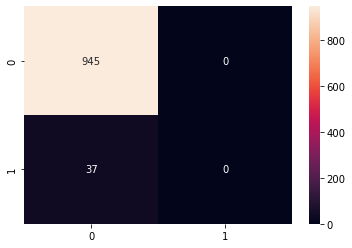

In [55]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

### Print Classification report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       0.00      0.00      0.00        37

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.93      0.96      0.94       982



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Create Random Forest model and Train it

In [57]:
rf_model = RandomForestClassifier()

In [58]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Check score

In [59]:
rf_model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [60]:
y_pred_rf = rf_model.predict(X_test)

### Evaluate the model

#### Accuracy_score

In [61]:
accuracy_score(y_test,y_pred_rf)

0.9613034623217923

### Plot confusion matrix on a heatmap

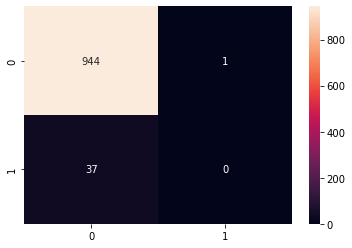

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot = True, fmt = 'd')
plt.show()

### Print Classification report

In [64]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       0.00      0.00      0.00        37

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.93      0.96      0.94       982



***